# Reviews dataset initial analysis

### Author
Luca Mircea

### Date started
6 May 2024

### Premise
I have been asked to write an ETL framework for the Amazon reviews dataset as part of a technical challenge; I will therefore:
- Read the data in order to get familiar with it
- Identify data points & their quality issues
- Create the data model
- Implement ETLs

In [1]:
# Import libs
import pandas as pd


In [2]:
reviews = pd.read_csv(r"C:\Users\lucam\Desktop\coding\amazon-reviews-ingestion\data_short\reviews_Clothing_Shoes_and_Jewelry_5.csv")
metadata = pd.read_csv(r"C:\Users\lucam\Desktop\coding\amazon-reviews-ingestion\data_short\metadata_category_clothing_shoes_and_jewelry_only.csv")

reviews.head(10)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5.0,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5.0,Very Cute!!,1358553600,"01 19, 2013"
2,2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5.0,I have buy more than one,1357257600,"01 4, 2013"
3,3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5.0,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5.0,Grammy's Angels Love it,1394841600,"03 15, 2014"
5,5,A27UF1MSF3DB2,0000031887,"C-Lo ""Cynthia""","[0, 0]",I received this today and I'm not a fan of it ...,4.0,It's ok,1396224000,"03 31, 2014"
6,6,A16GFPNVF4Y816,0000031887,design maven,"[0, 0]",Bought this as a backup to the regular ballet ...,5.0,Great for dress-up and for ballet practice,1399075200,"05 3, 2014"
7,7,A2M2APVYIB2U6K,0000031887,Jamie P.,"[0, 0]",Great tutu for a great price. It isn't a &#34;...,5.0,Great value,1356220800,"12 23, 2012"
8,8,A1NJ71X3YPQNQ9,0000031887,JBerger,"[0, 0]","My daughter liked this, and it with her costum...",4.0,Good,1384041600,"11 10, 2013"
9,9,A3EERSWHAI6SO,0000031887,"Jeffrey Hollingshead ""Jillian hollingshead""","[7, 8]",For what I paid for two tutus is unbeatable an...,5.0,WOW !! ..is all I have to say!,1349568000,"10 7, 2012"


In [3]:
metadata.head(10)

,metadataid,asin,salesrank,imurl,categories,title,description,price,related,brand
0,2005401,B00004SR8Z,{'Clothing': 1631},http://ecx.images-amazon.com/images/I/41RfWLMD...,"[['Clothing, Shoes & Jewelry', 'Luggage & Trav...",Lewis N. Clark Deluxe Neck Stash,NaN,12.80,"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', '...",Lewis N. Clark
1,2217897,B0000ZE74A,{'Clothing': 4742},http://ecx.images-amazon.com/images/I/41ryA-RO...,"[['Clothing, Shoes & Jewelry', 'Women', 'Cloth...",Vanity Fair Women's Lollipop Plus Size Cuff Le...,NaN,NaN,"{'also_bought': ['B004PEHJ6U', 'B0000TF5VK', '...",NaN
2,2220611,B00012O12A,{'Clothing': 4},http://ecx.images-amazon.com/images/I/41Dd7rCH...,"[['Clothing, Shoes & Jewelry', 'Men', 'Clothin...",Levi's Men's 505 Regular-Fit Jean,NaN,NaN,"{'also_bought': ['B0018OR118', 'B003M2X1VI', '...",NaN
3,2324985,B0002XSXWC,{'Clothing': 300},http://ecx.images-amazon.com/images/I/41-HS7D7...,"[['Sports & Outdoors', 'Clothing', 'Men', 'Shi...",Columbia Men's Bonehead Short Sleeve Fishing S...,NaN,NaN,"{'also_bought': ['B0031RFWMU', 'B0050VLSLO', '...",NaN
4,2348742,B00066TWMU,{'Clothing': 1199},http://ecx.images-amazon.com/images/I/51UNLUB4...,"[['Clothing, Shoes & Jewelry', 'ASICS'], ['Clo...",ASICS Mesh Backpack,NaN,12.41,"{'also_bought': ['B009DB3RS4', 'B001PFA35G', '...",ASICS
5,2429152,B0007SZ9WY,{'Shoes': 21050},http://ecx.images-amazon.com/images/I/41EhAUtP...,"[['Clothing, Shoes & Jewelry', 'Shoes & Access...",Minnetonka Women's Sheepskin Slipper Boot,NaN,NaN,"{'also_bought': ['B002QB1EGA', 'B0026MRR42', '...",NaN
6,2431225,B0007UDXF2,{'Shoes': 210},http://ecx.images-amazon.com/images/I/41lhBJHi...,"[['Clothing, Shoes & Jewelry', 'R', 'Rainbow S...",Rainbow Sandals Women's Premier Leather Single...,NaN,NaN,"{'also_bought': ['B0000ANAKR', 'B000M2EVAG', '...",NaN
7,2443394,B0008172YS,{'Clothing': 5304},http://ecx.images-amazon.com/images/I/41iEPmIE...,"[['Clothing, Shoes & Jewelry', 'Men', 'Clothin...","Wonder Button, Collar Expanders, Collar Extender",NaN,5.79,"{'also_bought': ['B005OCRZO8', 'B00FP462DK', '...",Competition
8,2459972,B0009DI4N8,{'Shoes': 6920},http://ecx.images-amazon.com/images/I/410h4LKy...,"[['Clothing, Shoes & Jewelry', 'M', 'Minnetonk...",Minnetonka Women's Kiltie Suede Softsole Mocca...,NaN,NaN,"{'also_bought': ['B0026MRNGO', 'B00BRCBBYY', '...",NaN
9,2504329,B000AC7OCK,NaN,http://ecx.images-amazon.com/images/I/41SZBR21...,"[['Clothing, Shoes & Jewelry', 'ACORN']]",Acorn New Spa Thong Slipper Accessory,NaN,NaN,"{'also_bought': ['B005P4Q3XE', 'B003D3OC6E', '...",NaN


In [4]:
# we can read the data description here: https://amazon-reviews-2023.github.io/
# we find that "asin" is the ID of the item, which is a link between the two data sets
# we also have user (reviewer) id, info on categories, sales ranks, bought together, etc.

# let's unpack some of the list/dict data to see what we find in it, then we can figure out
# a data model

# this data won't need a lot of wrangling and maneuvering, it's already quite clean. We mostly need to parse the date
# in the reviews dataset, check for duplicates, and that's about it

# our fact table is the reviews, and metadata seems to be basically the products dimensions table (have to check for duplicates)
# we can still distill a few different dimension tables: brands, categories, users

# I'll implement as the model a combination between Kimball and Vault 2.0: the various categories that any item belong to
# may be super relevant information, but only for some cases, so if there are a lot of them I'll save them all in their own table;
# same for related items

In [5]:
metadata.categories[0]

"[['Clothing, Shoes & Jewelry', 'Luggage & Travel Gear', 'Travel Accessories', 'Travel Wallets']]"

In [6]:
metadata.related[0]

"{'also_bought': ['B004RJWFDU', 'B00920ZC3O', 'B00920ZC3Y', 'B004RJWFN0', 'B0054IH8SA', 'B005IUBUKQ', 'B004SY5O5K', 'B0054IH614', 'B0054IHA4C', 'B003N7NN06', 'B000WO84Z2', 'B00A66VY9O', 'B003T0J5Y0', 'B004RJWFJO', 'B003GSKWOM', 'B0054IH3RQ', 'B0041E5RVI', 'B0054IHBLY', 'B00007KUX7', 'B005VCNRA2', 'B000OEP7TQ', 'B002Q4V174', 'B001CZT4I6', 'B00E0FZSQC', 'B00ESCWAYA', 'B0054IH27W', 'B001TUZSBQ', 'B000GCS004', 'B00A66VY8U', 'B000W9DJ1Q', 'B004SY9OVA', 'B004F3MQIM', 'B00CBTES9M', 'B003MU9JZM', 'B00CBTESA6', 'B00KCU4HDY', 'B001F5UZ4A', 'B000Y0CL8K', 'B007YKUWN4', 'B0000CNR1L', 'B007YL6HY6', 'B001CZP2EQ', 'B0054IH4RU', 'B00DTRHB2G', 'B00004SRAJ', 'B002LGY1CY', 'B004C0XZM4', 'B008HYWUE0', 'B000YN01X4', 'B00A8SXGKA', 'B0054M2J6W', 'B00CBSVUBM', 'B00CO1TBJY', 'B0054IGZAW', 'B00310GKBE', 'B00920ZCE8', 'B00332F1WY', 'B006L65C3M', 'B000BQW8AS', 'B0054IGXDQ', 'B004UB056E', 'B000W91XBO', 'B00IY9K72K', 'B0084OPT8C', 'B008Y8S38G', 'B00DDTO3LM', 'B00E7P7UHK', 'B00BH3FHWK', 'B003YID7SC', 'B00GON7IMU', 'B

In [7]:
# damn that's a lot, defo worth its own table

In [8]:
metadata.shape

(23033, 10)

In [9]:
reviews.shape

(278677, 10)

In [10]:
# the datasets are absolutely civilized in size lol

In [11]:
metadata.asin.nunique()

23033

In [12]:
# wow so nice! the metadata table is already the products dimensions table, neat!
# let's check for nulls
sum(pd.isnull(metadata['asin']))

0

In [13]:
reviews.asin.nunique()

23033

array([[<Axes: title={'center': 'count_distinct_categories'}>]],
      dtype=object)

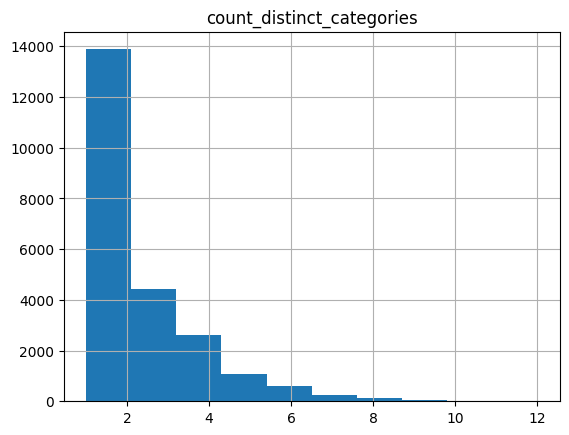

In [14]:
# ok we have a full match, all the items show up in the reviews, neat
# now let's see how many items we usually have in the categories and related columns

# neat little tricks for turning list strings into lists hahaha:
# https://stackoverflow.com/questions/1894269/how-to-convert-string-representation-of-list-to-a-list
import ast
import matplotlib.pyplot as plt

metadata['count_distinct_categories'] = [
    len(ast.literal_eval(list_of_categories_string))
    for list_of_categories_string in metadata['categories']
]

metadata[['count_distinct_categories']].hist(bins=10)

In [15]:
# silly histogram won't let us see properly
metadata['count_distinct_categories'].value_counts()

count_distinct_categories
1     7396
2     6485
3     4431
4     2632
5     1057
6      605
7      239
8      110
9       58
10      17
11       2
12       1
Name: count, dtype: int64

array([[<Axes: title={'center': 'count_also_bought'}>,
        <Axes: title={'center': 'count_also_viewed'}>],
       [<Axes: title={'center': 'count_all_related'}>, <Axes: >]],
      dtype=object)

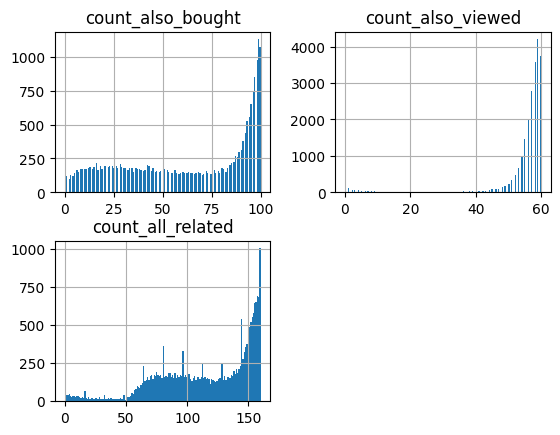

In [16]:
# so in the secondary dimensions table called extra_categories we can save 5 (because 4 digits each) big categories & the rest
# as just a string; let's do the same for the related items, that one's gonna be much more dramatic

metadata['count_also_bought'] = [
    len(ast.literal_eval(str(list_of_related_items))['also_bought'])  # this ast.literal_eval thingie is fireee
    if str(list_of_related_items) != 'nan' and 'also_bought' in (ast.literal_eval(str(list_of_related_items))).keys()
    else 0
    for list_of_related_items in metadata['related']
]

# it errors out at element 33
# metadata.loc[33, 'related']

metadata['count_also_viewed'] = [
    len(ast.literal_eval(str(list_of_related_items))['also_viewed'])
    if str(list_of_related_items) != 'nan' and 'also_viewed' in (ast.literal_eval(str(list_of_related_items))).keys()
    else 0
    for list_of_related_items in metadata['related']
]

metadata['count_all_related'] = metadata['count_also_bought'] + metadata['count_also_viewed']

metadata[['count_also_bought', 'count_also_viewed', 'count_all_related']].hist(bins=150)  # this one needs _a bunch_ of bins

array([[<Axes: title={'center': 'count_salesrank'}>]], dtype=object)

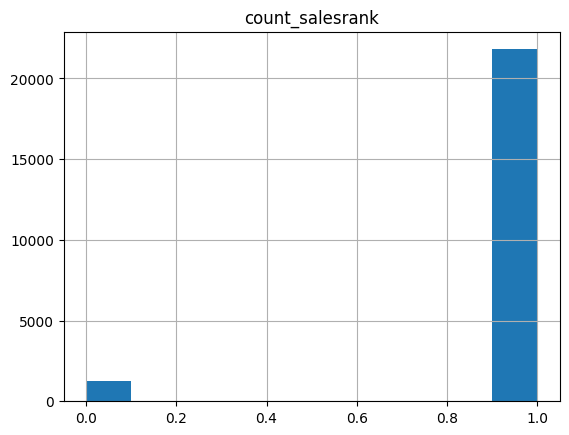

In [17]:
# it's super interesting to see the items with either very few (< 50) related items, and those with 150+
# this data is probably so revealing about customer behaviour and whatnot
# you could e.g. do PCA and/or clustering to see why an object ends up in the low or the high
# it would also be cool to know what the items with many related items have in common

# let me also check the sales rank

metadata['count_salesrank'] = [
    len((ast.literal_eval(str(list_of_related_items))).keys())
    if str(list_of_related_items) != 'nan'
    else 0
    for list_of_related_items in metadata['salesrank']
]

metadata[['count_salesrank']].hist(bins=10)

In [18]:
# either unranked or one single rank

# the data looks pretty straightforward. I'll still mess around with
# how to compile the helpfulness of reviews and maybe how to fix the date (or just parse it from the UNIX lol)
# but we can safely start with the model diagram